In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
pip install openpyxl

In [4]:
import pandas as pd
import openpyxl
# Load the dataset
df = pd.read_excel('/content/drive/MyDrive/congrres_dataset/final_ceramic_congress_dataset.xlsx')

# Display basic information about the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CVD type                50 non-null     object 
 1   Mo precursor            50 non-null     object 
 2   Mo precurs T            50 non-null     float64
 3   S precurs T             50 non-null     float64
 4   substrate               50 non-null     object 
 5   growth T (C.), highest  50 non-null     float64
 6   growth t (min)          50 non-null     float64
 7   growth P (torr          50 non-null     float64
 8   carrier                 50 non-null     object 
 9   epitaxial               50 non-null     int64  
 10  thickness               50 non-null     object 
 11  application             50 non-null     object 
 12  Morphology              50 non-null     object 
 13  Lateral Size (μm)       50 non-null     object 
dtypes: float64(5), int64(1), object(8)
memory us

In [5]:
print(df.isnull().sum())

# Optionally, you can drop or fill missing values
df = df.dropna()

CVD type                  0
Mo precursor              0
Mo precurs T              0
S precurs T               0
substrate                 0
growth T (C.), highest    0
growth t (min)            0
growth P (torr            0
carrier                   0
epitaxial                 0
thickness                 0
application               0
Morphology                0
Lateral Size (μm)         0
dtype: int64


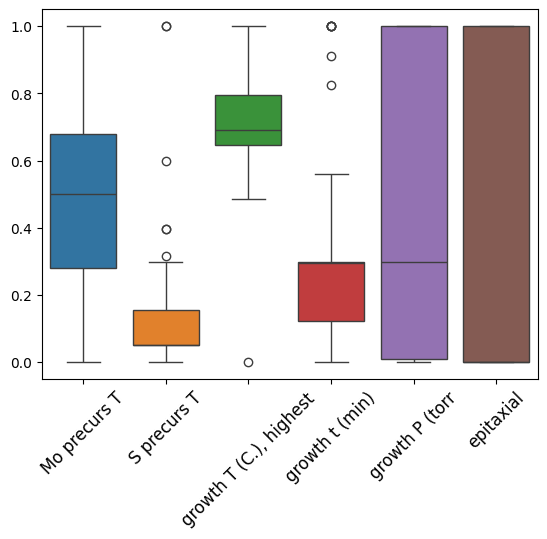

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize outliers using boxplots
sns.boxplot(data=df)
plt.xticks(rotation=45, fontsize=12)
plt.show()

In [6]:
# Clipping outliers
df["growth t (min)"] = df["growth t (min)"].clip(lower=df["growth t (min)"].quantile(0.05), upper=df["growth t (min)"].quantile(0.95))

In [7]:
df_new = df.drop('epitaxial', axis=1)

numeric_cols = df_new.select_dtypes(include=['number']).columns
#numeric_df = numeric_cols.drop(df['epitaxial'])
numeric_cols=['Mo precurs T', 'S precurs T', 'growth T (C.), highest','growth t (min)', 'growth P (torr']
numeric_cols_data=pd.DataFrame()

for col in numeric_cols:
    numeric_cols_data[col] = df_new[col]
#numeric_cols_data= pd.concat([numeric_cols_data,df["epitaxial"]],axis=1)
numeric_cols_data

,Mo precurs T,S precurs T,"growth T (C.), highest",growth t (min),growth P (torr
0,300.0,180.00,800.0,55.00,760.00000
1,700.0,250.00,700.0,60.00,760.00000
2,900.0,180.00,900.0,60.00,760.00000
3,497.3,127.76,675.0,10.00,225.89872
4,1000.0,120.00,1000.0,19.81,7.50000
5,800.0,120.00,800.0,19.81,7.50000
6,800.0,300.00,800.0,19.81,250.00000
7,800.0,300.00,800.0,19.81,250.00000
8,830.0,180.00,830.0,15.00,760.00000
9,780.0,210.00,780.0,3.00,225.89872


In [ ]:
numeric_cols_data

,Mo precurs T,S precurs T,"growth T (C.), highest",growth t (min),growth P (torr
0,300.0,180.00,800.0,55.00,760.00000
1,700.0,250.00,700.0,60.00,760.00000
2,900.0,180.00,900.0,60.00,760.00000
3,497.3,127.76,675.0,10.00,225.89872
4,1000.0,120.00,1000.0,19.81,7.50000
5,800.0,120.00,800.0,19.81,7.50000
6,800.0,300.00,800.0,19.81,250.00000
7,800.0,300.00,800.0,19.81,250.00000
8,830.0,180.00,830.0,15.00,760.00000
9,780.0,210.00,780.0,3.00,225.89872


In [8]:
from sklearn.preprocessing import MinMaxScaler

# Standardizing the data
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Converting back to DataFrame
#df = pd.DataFrame(df_scaled, columns=df.columns)
numeric_cols_data =df[numeric_cols]
numeric_cols_data

,Mo precurs T,S precurs T,"growth T (C.), highest",growth t (min),growth P (torr
0,0.000000,0.156627,0.794872,0.912281,1.000000
1,0.571429,0.297189,0.692308,1.000000,1.000000
2,0.857143,0.156627,0.897436,1.000000,1.000000
3,0.281857,0.051727,0.666667,0.122807,0.297234
4,1.000000,0.036145,1.000000,0.294912,0.009867
5,0.714286,0.036145,0.794872,0.294912,0.009867
6,0.714286,0.397590,0.794872,0.294912,0.328946
7,0.714286,0.397590,0.794872,0.294912,0.328946
8,0.757143,0.156627,0.825641,0.210526,1.000000
9,0.685714,0.216867,0.774359,0.000000,0.297234


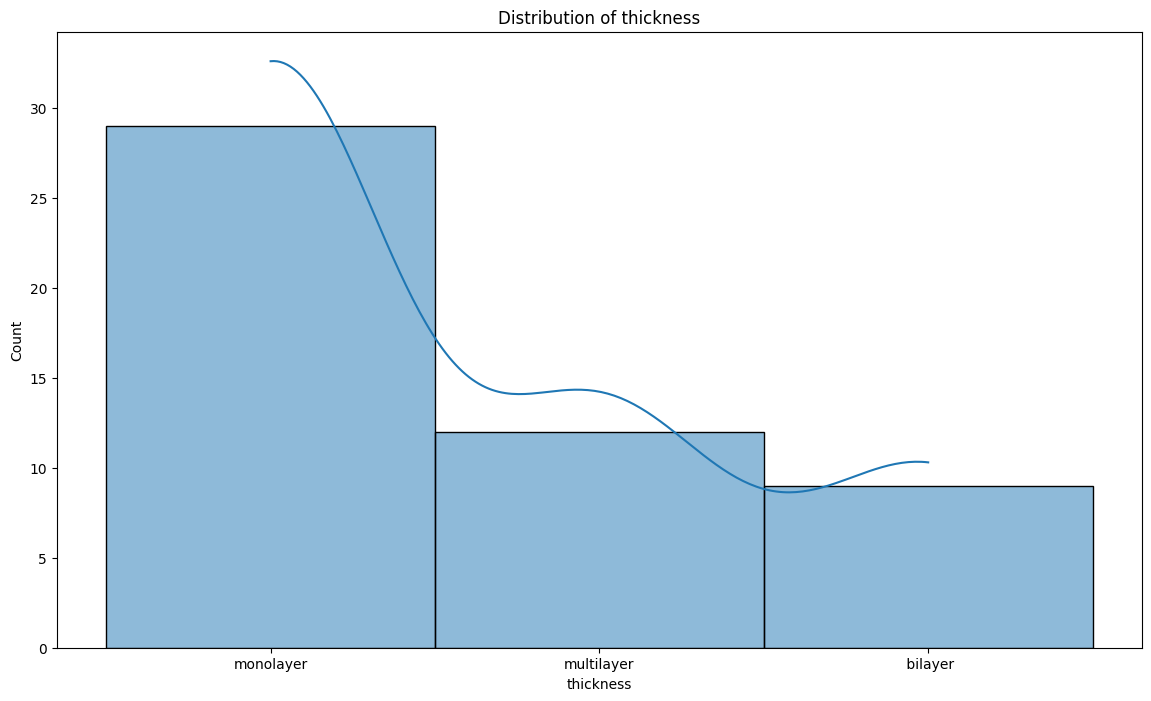

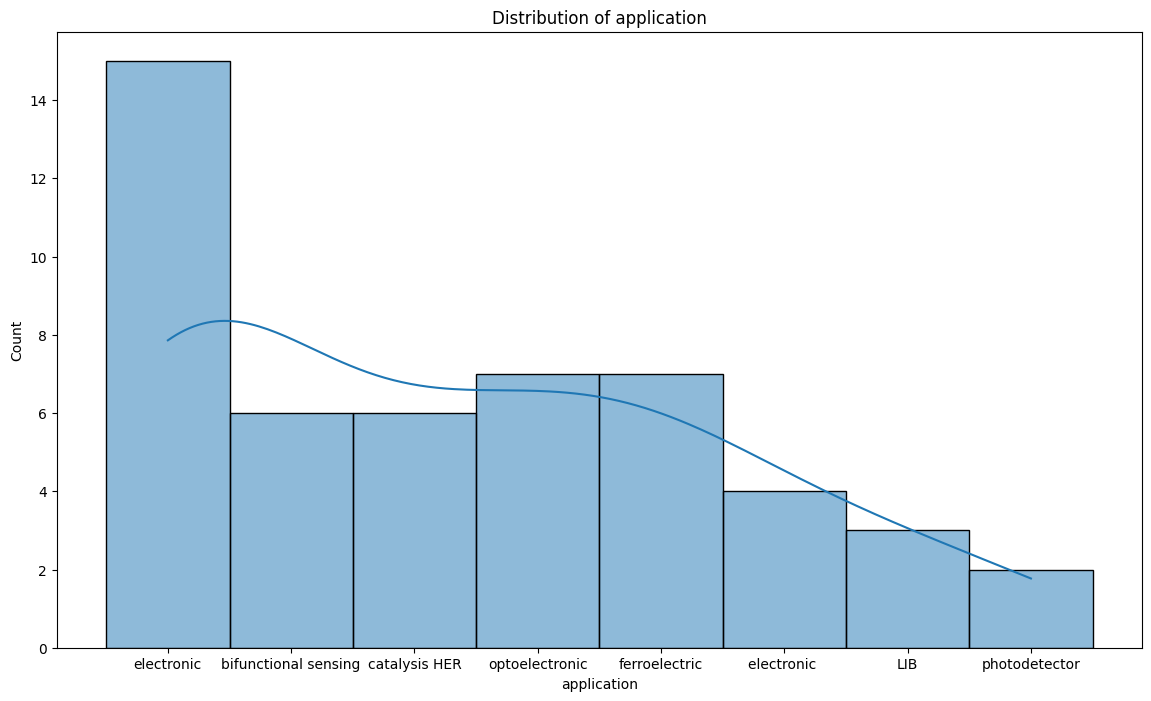

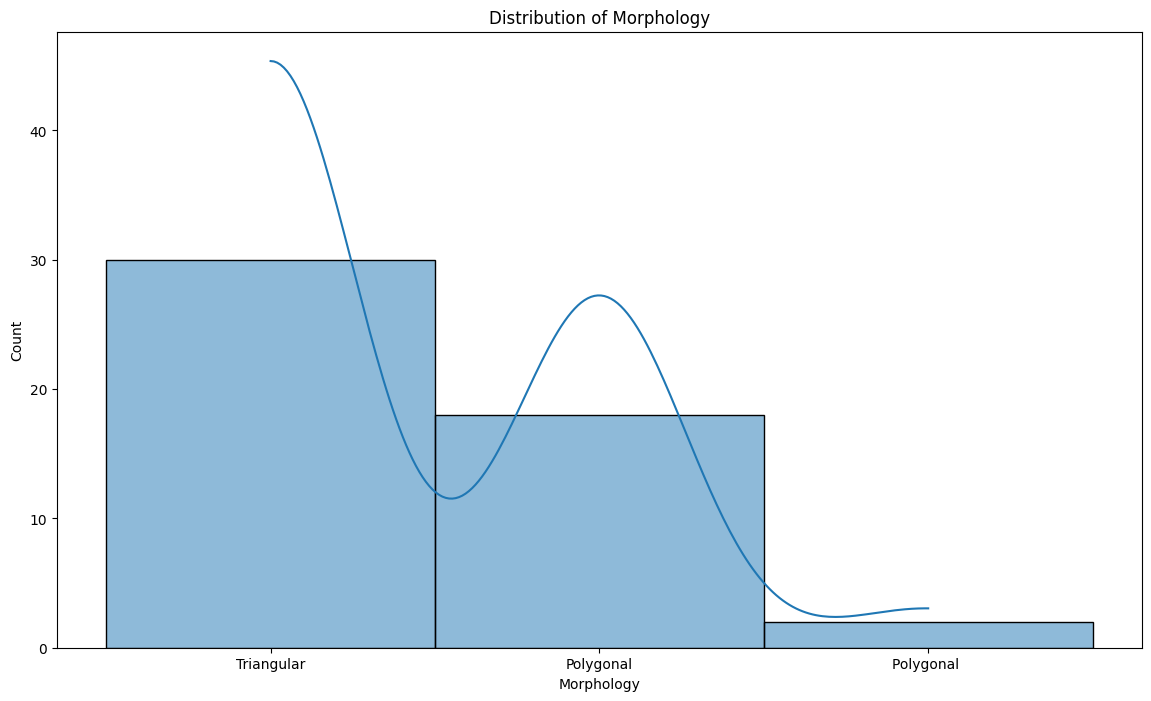

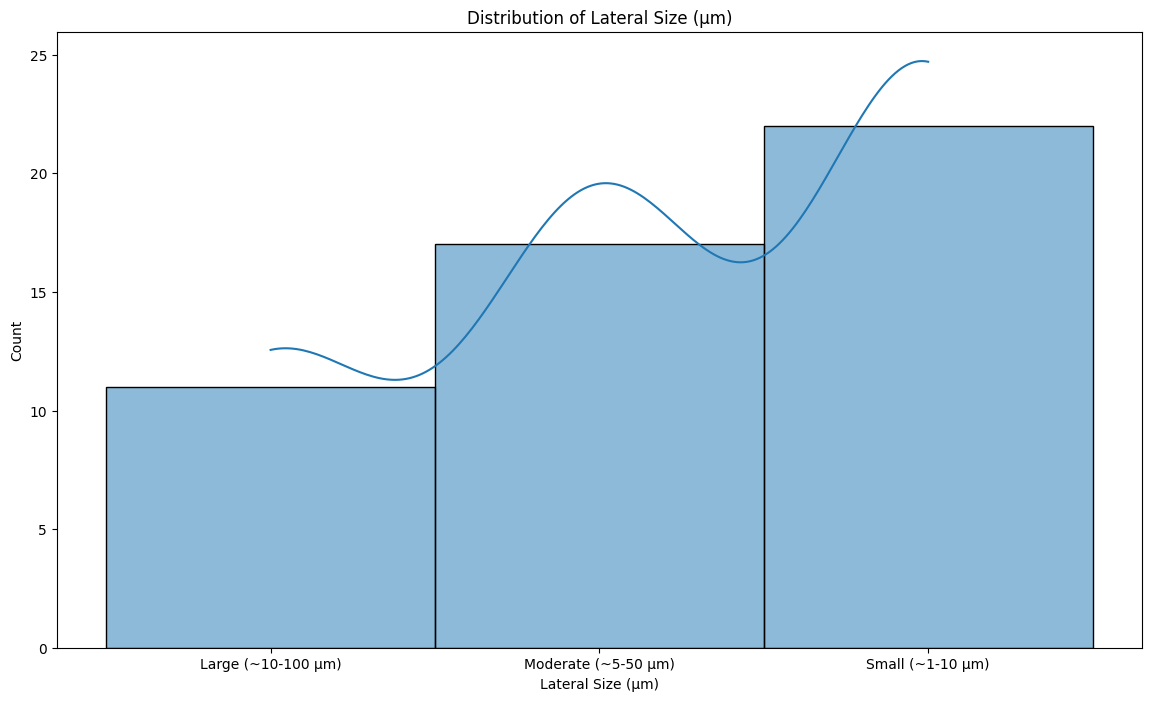

In [11]:
for col in ['thickness', 'application', 'Morphology', 'Lateral Size (μm)']:
    plt.figure(figsize=(14,8))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
for col in df:
  print(col)

CVD type
Mo precursor
Mo precurs T
S precurs T
substrate
growth T (C.), highest
growth t (min)
growth P (torr
carrier
epitaxial
thickness
application
Morphology
Lateral Size (μm)


In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
encoded_data = pd.DataFrame()
categorical_cols=['application', 'Morphology',"CVD type","Mo precursor","substrate","carrier","thickness","Lateral Size (μm)"]
for column in df[categorical_cols]:
    encoder = LabelEncoder()
    encoded_data[column] = encoder.fit_transform(df[column])
    label_encoders[column] = encoder
    mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    print(mapping)
print("Encoded Data using LabelEncoder:")
print(encoded_data)

{'LIB': 0, 'bifunctional sensing': 1, 'catalysis HER': 2, 'electronic': 3, 'electronic ': 4, 'ferroelectric': 5, 'optoelectronic': 6, 'photodetector': 7}
{'Polygonal': 0, 'Polygonal ': 1, 'Triangular': 2}
{'double vapor': 0, 'single vapor': 1}
{'MoO3 film': 0, 'MoO3 powder': 1}
{'Au (100 nm)': 0, 'CNTs on SiO2/Si': 1, 'SiO2': 2, 'SiO2/Si': 3, 'SiO3': 4, 'SiO4': 5, 'graphene': 6, 'h-BN': 7, 'quartz': 8, 'sapphire': 9}
{'Ar': 0, 'N2': 1}
{' bilayer': 0, 'monolayer': 1, 'multilayer': 2}
{'Large (~10-100 μm)': 0, 'Moderate (~5-50 μm)': 1, 'Small (~1-10 μm)': 2}
Encoded Data using LabelEncoder:
    application  Morphology  CVD type  Mo precursor  substrate  carrier  \
0             3           2         0             1          7        0   
1             3           2         0             1          2        0   
2             1           0         0             1          9        0   
3             1           2         1             0          9        1   
4             2           2 

In [10]:
df_prep=pd.concat([encoded_data,df["epitaxial"],numeric_cols_data],axis=1)
df_cat=pd.concat([encoded_data,df["epitaxial"]],axis=1)

df_prep

,application,Morphology,CVD type,Mo precursor,substrate,carrier,thickness,Lateral Size (μm),epitaxial,Mo precurs T,S precurs T,"growth T (C.), highest",growth t (min),growth P (torr
0,3,2,0,1,7,0,1,0,0,0.000000,0.156627,0.794872,0.912281,1.000000
1,3,2,0,1,2,0,1,0,1,0.571429,0.297189,0.692308,1.000000,1.000000
2,1,0,0,1,9,0,2,1,0,0.857143,0.156627,0.897436,1.000000,1.000000
3,1,2,1,0,9,1,1,0,1,0.281857,0.051727,0.666667,0.122807,0.297234
4,2,2,0,1,3,1,0,2,1,1.000000,0.036145,1.000000,0.294912,0.009867
5,2,0,0,1,6,1,1,2,1,0.714286,0.036145,0.794872,0.294912,0.009867
6,2,2,0,1,3,0,2,0,0,0.714286,0.397590,0.794872,0.294912,0.328946
7,2,2,0,1,3,0,2,1,0,0.714286,0.397590,0.794872,0.294912,0.328946
8,3,2,0,1,3,0,1,1,1,0.757143,0.156627,0.825641,0.210526,1.000000
9,1,2,0,1,3,1,1,1,1,0.685714,0.216867,0.774359,0.000000,0.297234


In [11]:
from scipy.stats import pointbiserialr

correlation, p_value = pointbiserialr(encoded_data['CVD type'], numeric_cols_data['growth t (min)'])
correlation


-0.1423510217105401

In [12]:
df.dropna(inplace=True)  # Drop missing data
print(df.isnull().sum())  # Check for NaN values


CVD type                  0
Mo precursor              0
Mo precurs T              0
S precurs T               0
substrate                 0
growth T (C.), highest    0
growth t (min)            0
growth P (torr            0
carrier                   0
epitaxial                 0
thickness                 0
application               0
Morphology                0
Lateral Size (μm)         0
dtype: int64


In [14]:
# Example: Compare 'growth T (C.)' between different 'CVD type'
group1 = df_prep[df_prep['CVD type'] == 0]['growth T (C.), highest']
group2 = df_prep[df_prep['CVD type'] == 1]['growth T (C.), highest']
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U Test
stat, p_value_mannwhitney = mannwhitneyu(group1, group2)


from sklearn.utils import resample


def permutation_test_manual(data1, data2, n_permutations=1000):
    # Calculate observed correlation
    observed_stat = np.abs(data1.corr(data2))

    # Generate permutations
    perm_stats = []
    for _ in range(n_permutations):
        permuted_data = resample(data2)
        perm_stat = np.abs(data1.corr(permuted_data))
        perm_stats.append(perm_stat)

    # Calculate p-value
    perm_stats = np.array(perm_stats)
    p_value = np.mean(perm_stats >= observed_stat)

    return observed_stat, p_value

# Perform the manual permutation test for 'CVD type' and 'application'
observed_stat, p_value_permutation_manual = permutation_test_manual(df_prep['CVD type'], df_prep['application'])
RE= {"p_value_mannwhitney":p_value_mannwhitney,"p_value_permutation_manual":p_value_permutation_manual}
# Return results for Mann-Whitney and Permutation Test
pd.DataFrame([RE])


,p_value_mannwhitney,p_value_permutation_manual
0,0.620194,0.528


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

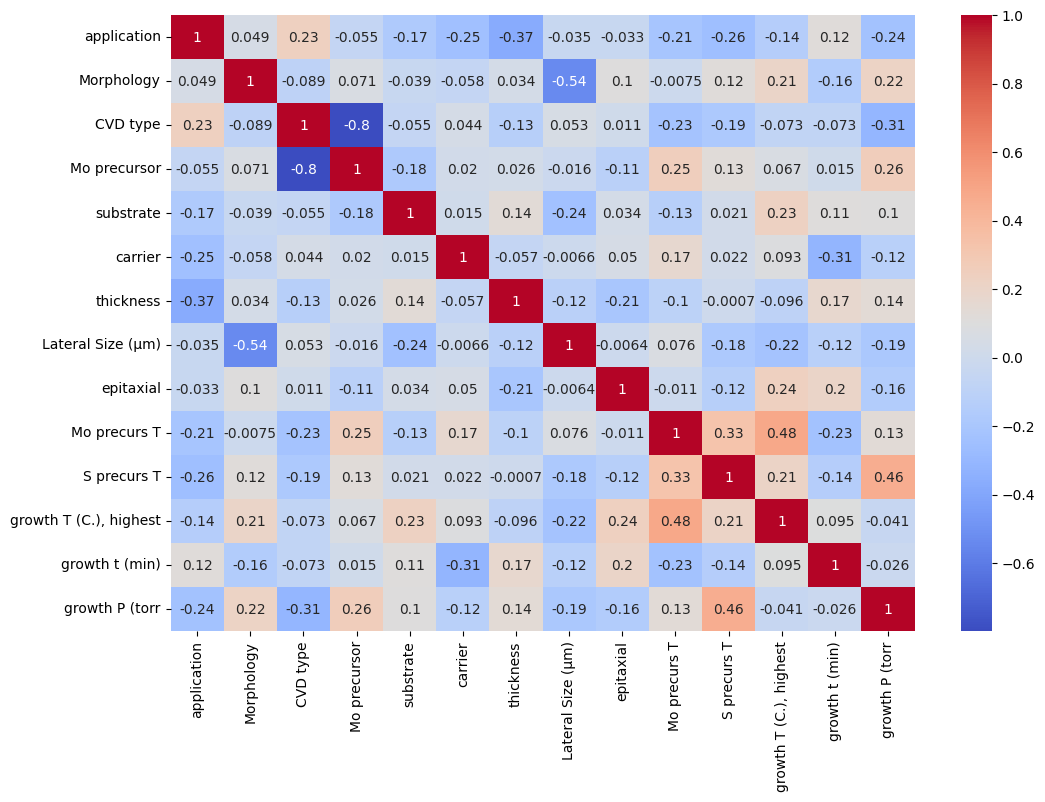

In [17]:
# Correlation matrix
corr_matrix = df_prep.corr(method='spearman')
plt.figure(figsize=(12, 8))

# Visualizing the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

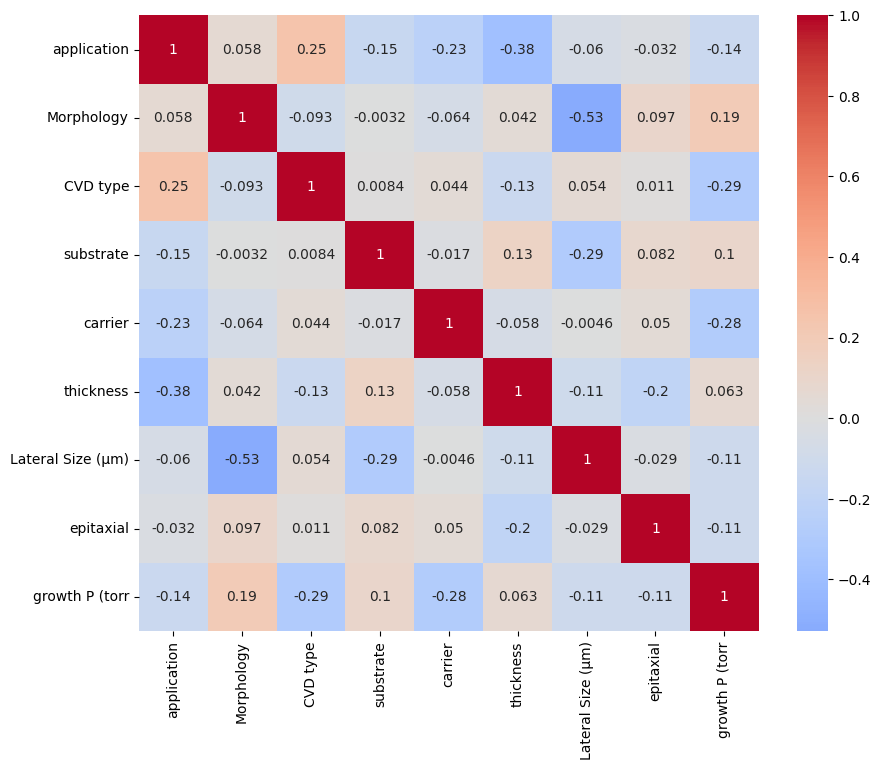

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Remove features with low variance
selector = VarianceThreshold(threshold=0.1)
reduced_features = selector.fit_transform(df_prep)

# New DataFrame
reduced_df = pd.DataFrame(reduced_features, columns=df_prep.columns[selector.get_support()])

# Compute correlation matrix
correlation_matrix = reduced_df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()


<Figure size 1000x1000 with 0 Axes>

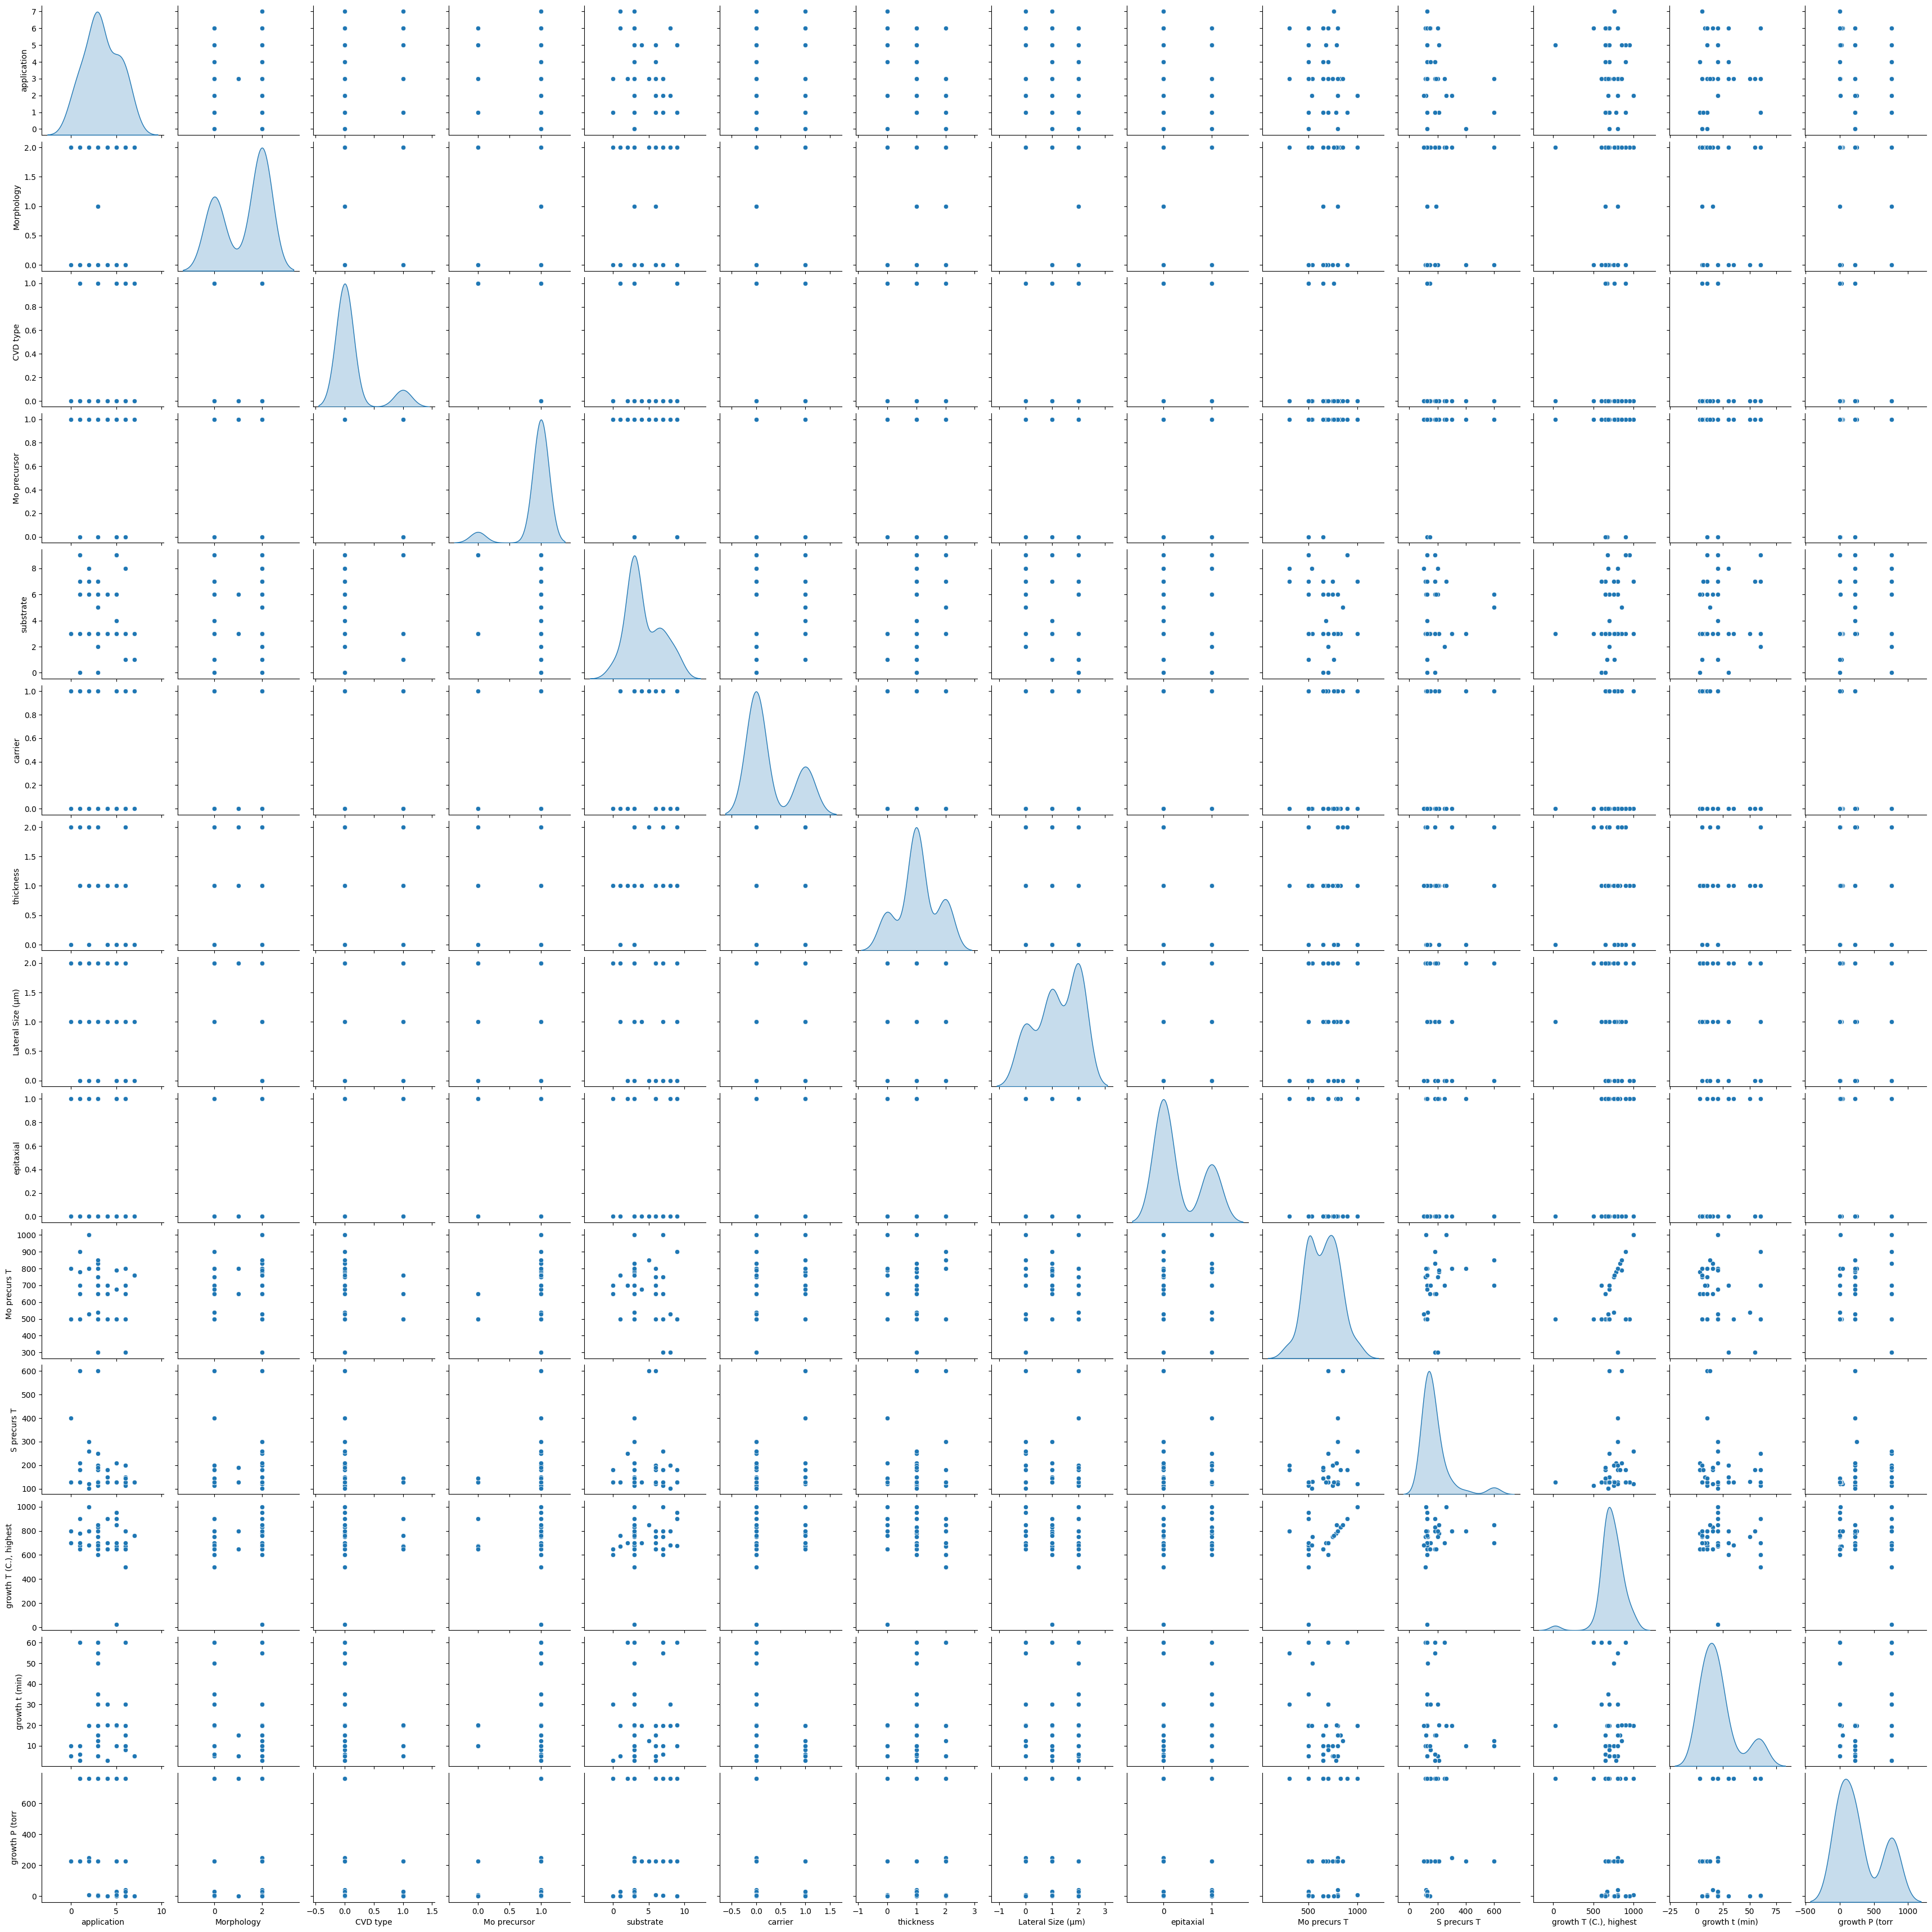

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.pairplot(df_prep, diag_kind='kde')  # Use 'kde' for kernel density estimates, or 'hist' for histograms

# Show plot
plt.show()

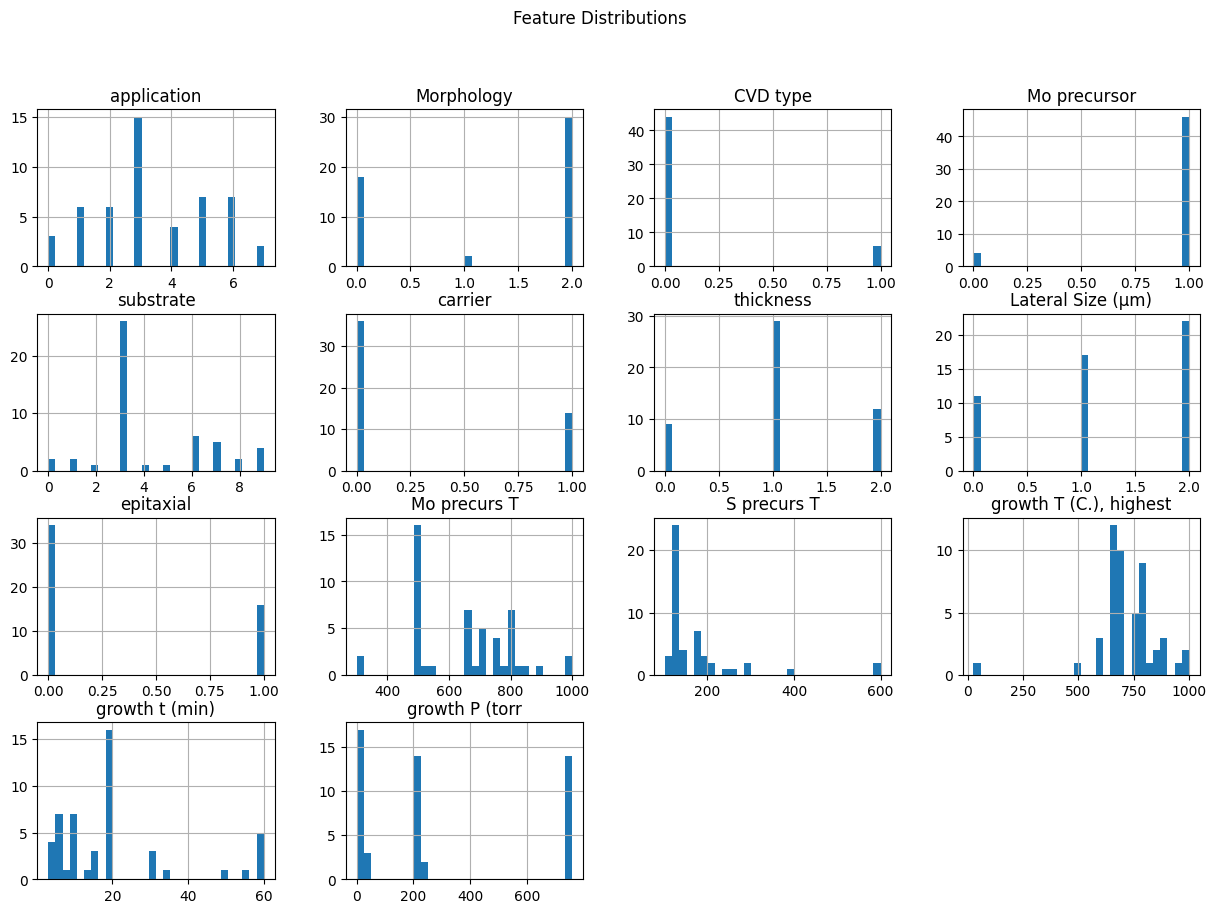

In [ ]:
df_prep.hist(bins=30, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()

In [15]:
pip install tensorflow keras matplotlib


In [16]:
pip install --upgrade tensorflow keras


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1


In [ ]:
!pip install tensorflow==2.16.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 84.2 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.16.1 w

# **categoric generation**

In [17]:
def bootstrap_sample(df, n_samples):
    bootstrap_samples = []
    for _ in range(n_samples):
        # Randomly sample with replacement
        sample = df.sample(n=len(df), replace=True)
        bootstrap_samples.append(sample)

    # Concatenate all bootstrapped samples into a single DataFrame
    bootstrapped_df = pd.concat(bootstrap_samples, ignore_index=True)

    return bootstrapped_df

# Generate bootstrapped DataFrame with 5 samples
n_bootstrap_samples = 10
bootstrapped_datasets = bootstrap_sample(encoded_data, n_bootstrap_samples)

# Display the bootstrapped dataset
bootstrapped_datasets


,application,Morphology,CVD type,Mo precursor,substrate,carrier,thickness,Lateral Size (μm)
0,2,2,0,1,3,0,2,0
1,3,2,0,1,3,1,2,1
2,5,2,0,1,9,0,1,0
3,2,2,0,1,3,0,2,1
4,6,0,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...
495,4,2,0,1,6,0,1,2
496,7,2,0,1,3,1,0,0
497,1,2,0,1,0,0,1,2
498,4,2,0,1,3,0,1,2


# numeric **generation**




In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU

def build_generator(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim))
    model.add(LeakyReLU(alpha=0.5))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.5))
    model.add(Dense(5, activation='sigmoid'))  # Output layer with 5 features
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model


In [19]:
def build_discriminator(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim))
    model.add(LeakyReLU(alpha=0.5))
    model.add(Dense(64))
    model.add(LeakyReLU(alpha=0.5))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [20]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = Input(shape=(100,))  # Latent dimension
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan


In [21]:
import numpy as np

def train_gan(epochs, batch_size, df):
    # Hyperparameters
    latent_dim = 100

    # Build models
    generator = build_generator(latent_dim)
    discriminator = build_discriminator(5)
    gan = build_gan(generator, discriminator)

    # Training loop
    for epoch in range(epochs):
        # Train discriminator
        indices = np.random.randint(0, df.shape[0], batch_size)
        real_data = df.iloc[indices].values  # Convert DataFrame to NumPy array here
        fake_data = generator.predict(np.random.randn(batch_size, latent_dim))

        d_loss_real = discriminator.train_on_batch(real_data, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_data, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train generator
        g_loss = gan.train_on_batch(np.random.randn(batch_size, latent_dim), np.ones((batch_size, 1)))

        # Print the progress
        print(f"Epoch {epoch} | D Loss: {d_loss[0]} | G Loss: {g_loss}")
    return generator
# Call the function with the DataFrame

def generate_samples(generator, num_samples, latent_dim):
    # Generate random noise vectors
    noise = np.random.randn(num_samples, latent_dim)

    # Use the generator to produce samples
    generated_samples = generator.predict(noise)

    generated_df = pd.DataFrame(generated_samples, columns=['Mo precurs T', 'S precurs T', 'growth T (C.)', 'highest growth t (min)', 'growth P (torr)'])

    # Inverse transform the data if normalized
    #if scaler:
    #generated_df = pd.DataFrame(scaler.inverse_transform(generated_df), columns=generated_df.columns)

    return generated_df

# Train the GAN
trained_generator = train_gan(epochs=500, batch_size=32, df=numeric_cols_data)

# Generate samples
num_samples = 500  # Specify the number of samples you want
generated_df = generate_samples(trained_generator, num_samples, 100)
#generated_df = scaler.inverse_transform(generated_df)
#, columns=generated_df.columns)
# If you normalized the data, you might need to reverse normalization
# For example, if you used MinMaxScaler, use the inverse transform
# scaler = MinMaxScaler()  # Use the same scaler you used for normalization
# generated_samples = scaler.inverse_transform(generated_samples)

generated_df


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0 | D Loss: 0.7013626098632812 | G Loss: [array(0.6932002, dtype=float32), array(0.6932002, dtype=float32), array(0.6932002, dtype=float32), array(0.5625, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Epoch 1 | D Loss: 0.7016052603721619 | G Loss: [array(0.69917595, dtype=float32), array(0.69917595, dtype=float32), array(0.69917595, dtype=float32), array(0.4765625, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Epoch 2 | D Loss: 0.7008994817733765 | G Loss: [array(0.69918317, dtype=float32), array(0.69918317, dtype=float32), array(0.69918317, dtype=float32), array(0.49479166, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Epoch 3 | D Loss: 0.7011973857879639 | G Loss: [array(0.70043075, dtype=float32), array(0.70043075, dtype=float32), array(0.70043075, dtype=float32), array(0.4609375, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Epoch 4 | D Loss: 0.7014902234077454 | G Loss: [array(0.7009441, dtype=float32), array(0.7009441, dtype=float32), array(0.7009441, dtype=float32), array(0.41875, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Epoch 5 | D Loss: 0.7020580768585205 | G Loss: [array(0.7018404, dtype=float32), array(0.7018404, dtype=float32), array(

,Mo precurs T,S precurs T,growth T (C.),highest growth t (min),growth P (torr)
0,0.999745,0.000443,0.000914,0.000086,0.999852
1,0.999968,0.000290,0.000685,0.000024,0.999959
2,0.999769,0.000664,0.001383,0.000126,0.999759
3,0.999680,0.000769,0.002233,0.000203,0.999813
4,0.999865,0.000247,0.000821,0.000065,0.999708
...,...,...,...,...,...
495,0.999841,0.000873,0.002167,0.000267,0.999838
496,0.999977,0.000471,0.000280,0.000051,0.999976
497,0.999875,0.000201,0.001079,0.000119,0.999723
498,0.999978,0.000192,0.000988,0.000046,0.999929


In [22]:
df_new= pd.concat([bootstrapped_datasets,generated_df],axis=1)

In [23]:
df_new

,application,Morphology,CVD type,Mo precursor,substrate,carrier,thickness,Lateral Size (μm),Mo precurs T,S precurs T,growth T (C.),highest growth t (min),growth P (torr)
0,2,2,0,1,3,0,2,0,0.999745,0.000443,0.000914,0.000086,0.999852
1,3,2,0,1,3,1,2,1,0.999968,0.000290,0.000685,0.000024,0.999959
2,5,2,0,1,9,0,1,0,0.999769,0.000664,0.001383,0.000126,0.999759
3,2,2,0,1,3,0,2,1,0.999680,0.000769,0.002233,0.000203,0.999813
4,6,0,1,1,1,1,1,2,0.999865,0.000247,0.000821,0.000065,0.999708
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4,2,0,1,6,0,1,2,0.999841,0.000873,0.002167,0.000267,0.999838
496,7,2,0,1,3,1,0,0,0.999977,0.000471,0.000280,0.000051,0.999976
497,1,2,0,1,0,0,1,2,0.999875,0.000201,0.001079,0.000119,0.999723
498,4,2,0,1,3,0,1,2,0.999978,0.000192,0.000988,0.000046,0.999929


In [24]:
X = df_new.drop(['thickness', 'application', 'Morphology', 'Lateral Size (μm)'], axis=1)  # Features
y = df_new[['thickness', 'application', 'Morphology', 'Lateral Size (μm)']]

In [28]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor, MultiOutputClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Split features and all target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor or classifier (for multi-target learning)
xgb_model = xgb.XGBClassifier()  # XGBClassifier() if it's classification

# Wrap XGBoost into a multi-output model
multi_target_model = MultiOutputClassifier(xgb_model)  # Use MultiOutputClassifier for classification

# Fit the model on the training data
multi_target_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = multi_target_model.predict(X_test)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# RandomForest with hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
}

rf = RandomForestClassifier()
multi_target_model = MultiOutputClassifier(rf)  # Use MultiOutputClassifier for classification

# Fit the model on the training data
multi_target_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = multi_target_model.predict(X_test)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=3)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 220, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true,

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize lists to store metrics for each target
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Loop through each target variable separately
for i, target_column in enumerate(y_test.columns):
    # Get predictions for the current target
    y_true = y_test.iloc[:, i]
    y_pred_target = y_pred_rf[:, i].round()  # Round predictions if they are continuous

    # Calculate metrics for the current target
    accuracy = accuracy_score(y_true, y_pred_target)
    precision = precision_score(y_true, y_pred_target, average='macro')
    recall = recall_score(y_true, y_pred_target, average='macro')
    f1 = f1_score(y_true, y_pred_target, average='macro')

    # Store the metrics
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    print(f"{target_column} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")

# You can now compute the mean or visualize the metrics across all targets
average_accuracy = sum(accuracies) / len(accuracies)
average_precision = sum(precisions) / len(precisions)
average_recall = sum(recalls) / len(recalls)
average_f1 = sum(f1_scores) / len(f1_scores)

print(f"Average Accuracy: {average_accuracy}, Average Precision: {average_precision}, Average Recall: {average_recall}, Average F1: {average_f1}")


thickness - Accuracy: 0.5, Precision: 0.39588189588189593, Recall: 0.3862337662337662, F1: 0.35915646853146854
application - Accuracy: 0.38, Precision: 0.35826451628082057, Recall: 0.3300766283524904, F1: 0.33381876575081443
Morphology - Accuracy: 0.73, Precision: 0.5294354028531244, Recall: 0.4797619047619048, F1: 0.47431693989071033
Lateral Size (μm) - Accuracy: 0.62, Precision: 0.6303063861203396, Recall: 0.603399524452156, F1: 0.6136161781785886
Average Accuracy: 0.5575, Average Precision: 0.47847205028404516, Average Recall: 0.44986795595007933, Average F1: 0.44522708808789546


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
   len(label_encoders['application'].classes_), # Number of classes for application
    len(label_encoders['Morphology'].classes_),  # Number of classes for morphology
    len(label_encoders['Lateral Size (μm)'].classes_)  # Number of classes for lateral size

IndentationError: unexpected indent (<ipython-input-31-c2d4f5fcdb91>, line 2)

In [29]:
X = df_new.drop('thickness', axis=1)  # Features
y = df_new['thickness']

#, 'application', 'Morphology', 'Lateral Size (μm)']]

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout



# Define features and target
X = df_new.drop(['thickness'], axis=1)
y = df_new['thickness']

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Build the model

In [31]:
num_classes = len(np.unique(y_encoded))


Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.3707 - loss: 1.1406 - val_accuracy: 0.5000 - val_loss: 1.0343
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4788 - loss: 1.0791 - val_accuracy: 0.5375 - val_loss: 1.0061
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4787 - loss: 1.0271 - val_accuracy: 0.5625 - val_loss: 0.9854
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4686 - loss: 1.0341 - val_accuracy: 0.5625 - val_loss: 0.9703
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4181 - loss: 1.1264 - val_accuracy: 0.5625 - val_loss: 0.9633
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4789 - loss: 1.0149 - val_accuracy: 0.5750 - val_loss: 0.9555
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4915 - loss: 1.0401 - val_accuracy: 0.5875 - val_loss: 0.9447
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5211 - loss: 1.0630 - val_accuracy: 0.6250 - val_loss: 0.

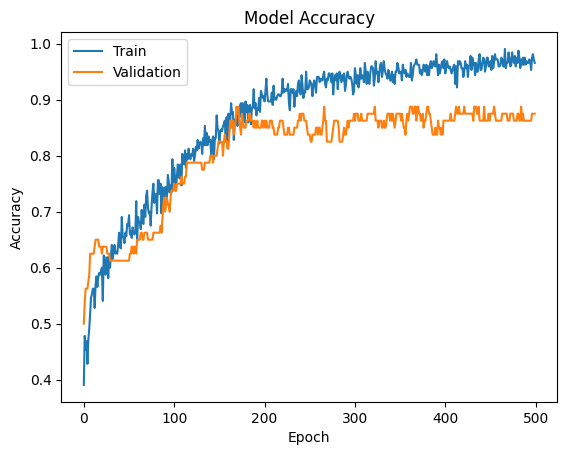

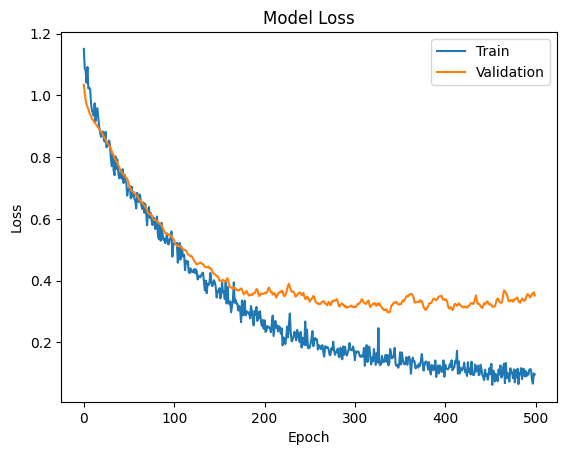

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout



# Define features and target
X = df_new.drop(['thickness'], axis=1)
y = df_new['thickness']

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Build the model
def build_nn_model(input_shape, num_classes):

    model = Sequential([
    Dense(64, input_dim=input_shape, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Determine number of classes
num_classes = len(np.unique(y_encoded))

# Build and train the model
model = build_nn_model(X_train_scaled.shape[1], num_classes)
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=500, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()


In [ ]:
X_train.shape[1]

12

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Decode the predictions if necessary
# Convert predictions back to the original categorical values
# Here, we assume each column of y_test is a one-hot encoded vector
y_pred_classes = np.argmax(y_pred, axis=1)


In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Scatter plot for predictions vs actual values for each target
# Here we use one target for demonstration. Extend as needed for other targets.
target_names = ['thickness', 'application', 'Morphology', 'Lateral Size (μm)']

for i, target in enumerate(target_names):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test[target], y_pred[:, i], alpha=0.5)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {target}')
    plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line
    plt.show()


In [26]:
pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.0 MB/s eta 0:00:00


In [37]:
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from optuna.visualization import plot_param_importances, plot_optimization_history

# Use inline plotting in Colab
%matplotlib inline

# Data preparation
X = df_new.drop(['thickness'], axis=1)
y = df_new['thickness']

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define number of classes
num_classes = len(np.unique(y_train))

# Objective function for Optuna
def objective(trial):
    num_hidden_layers = trial.suggest_int('num_hidden_layers', 1, 3)
    num_units = trial.suggest_int('num_units', 32, 128)
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-1)

    # Build the model
    model = Sequential()
    model.add(Dense(num_units, input_dim=X_train.shape[1], activation='relu'))

    for _ in range(num_hidden_layers):
        model.add(Dense(num_units, activation='relu'))
        model.add(Dropout(dropout_rate))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32,
                        callbacks=[early_stopping], verbose=0)

    # Return the validation accuracy
    val_accuracy = history.history['val_accuracy'][-1]
    return val_accuracy

# Create Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)  # Run fewer trials to test



# Plot Parameter Importance
fig_param_importances = plot_param_importances(study)
fig_param_importances.show()

# Plot Optimization History
fig_opt_history = plot_optimization_history(study)
fig_opt_history.show()


# Check completed trials
print(f"Number of completed trials: {len(study.trials)}")


[I 2024-09-08 22:19:27,503] A new study created in memory with name: no-name-14f38e95-e09a-4ab4-b433-9bad178025bb
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

[I 2024-09-08 22:19:30,043] Trial 0 finished with value: 0.550000011920929 and parameters: {'num_hidden_layers': 1, 'num_units': 33, 'dropout_rate': 0.20452272931919535, 'learning_rate': 0.0078682827859387}. Best is trial 0 with value: 0.550000011920929.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

[I 2024-09-08 22:19:33,902] Trial 1 finished with value: 0.612500011920929 and parameters: {'num_hidden_layer

Number of completed trials: 5


In [38]:
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from optuna.visualization import plot_param_importances, plot_optimization_history

X = df_new.drop(['thickness'], axis=1)
y = df_new['thickness']

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
# Objective function for Optuna
def objective(trial):
    # Define hyperparameters
    num_hidden_layers = trial.suggest_int('num_hidden_layers', 1, 3)
    num_units = trial.suggest_int('num_units', 32, 128)
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-1)

    # Build the model
    model = Sequential()
    model.add(Dense(num_units, input_dim=X_train.shape[1], activation='relu'))

    for _ in range(num_hidden_layers):
        model.add(Dense(num_units, activation='relu'))
        model.add(Dropout(dropout_rate))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32,
                        callbacks=[early_stopping], verbose=0)

    # Return the validation accuracy
    val_accuracy = history.history['val_accuracy'][-1]
    return val_accuracy
# Create Optuna study
study = optuna.create_study(direction='maximize')  # maximize validation accuracy
study.optimize(objective, n_trials=50)  # Number of trials

fig_param_importances = plot_param_importances(study)
fig_param_importances.show()

# Plot Optimization History
fig_opt_history = plot_optimization_history(study)
fig_opt_history.show()
# Print the best hyperparameters
print('Best hyperparameters: ', study.best_params)
print('Best validation accuracy: ', study.best_value)
best_params = study.best_params



[I 2024-09-08 22:20:29,376] A new study created in memory with name: no-name-f7ec967f-ca53-4bfc-9f16-a07b44c09527
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

[I 2024-09-08 22:20:32,780] Trial 0 finished with value: 0.550000011920929 and parameters: {'num_hidden_layers': 3, 'num_units': 115, 'dropout_rate': 0.49588942061667496, 'learning_rate': 0.0595371440242631}. Best is trial 0 with value: 0.550000011920929.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

[I 2024-09-08 22:20:36,812] Trial 1 finished with value: 0.550000011920929 and parameters: {'num_hidden_laye

Best hyperparameters:  {'num_hidden_layers': 1, 'num_units': 64, 'dropout_rate': 0.20156429816635885, 'learning_rate': 0.0023647098678370583}
Best validation accuracy:  0.987500011920929


In [ ]:
# Build the final model with best parameters
final_model = Sequential()
final_model.add(Dense(best_params['num_units'], input_dim=X_train.shape[1], activation='relu'))

for _ in range(best_params['num_hidden_layers']):
    final_model.add(Dense(best_params['num_units'], activation='relu'))
    final_model.add(Dropout(best_params['dropout_rate']))

final_model.add(Dense(num_classes, activation='softmax'))

final_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_params['learning_rate']),
                    loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the final model
final_history = final_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32,
                               callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

# Evaluate the final model
final_loss, final_accuracy = final_model.evaluate(X_test, y_test)
print(f"Final Model Test Loss: {final_loss}, Final Model Test Accuracy: {final_accuracy}")


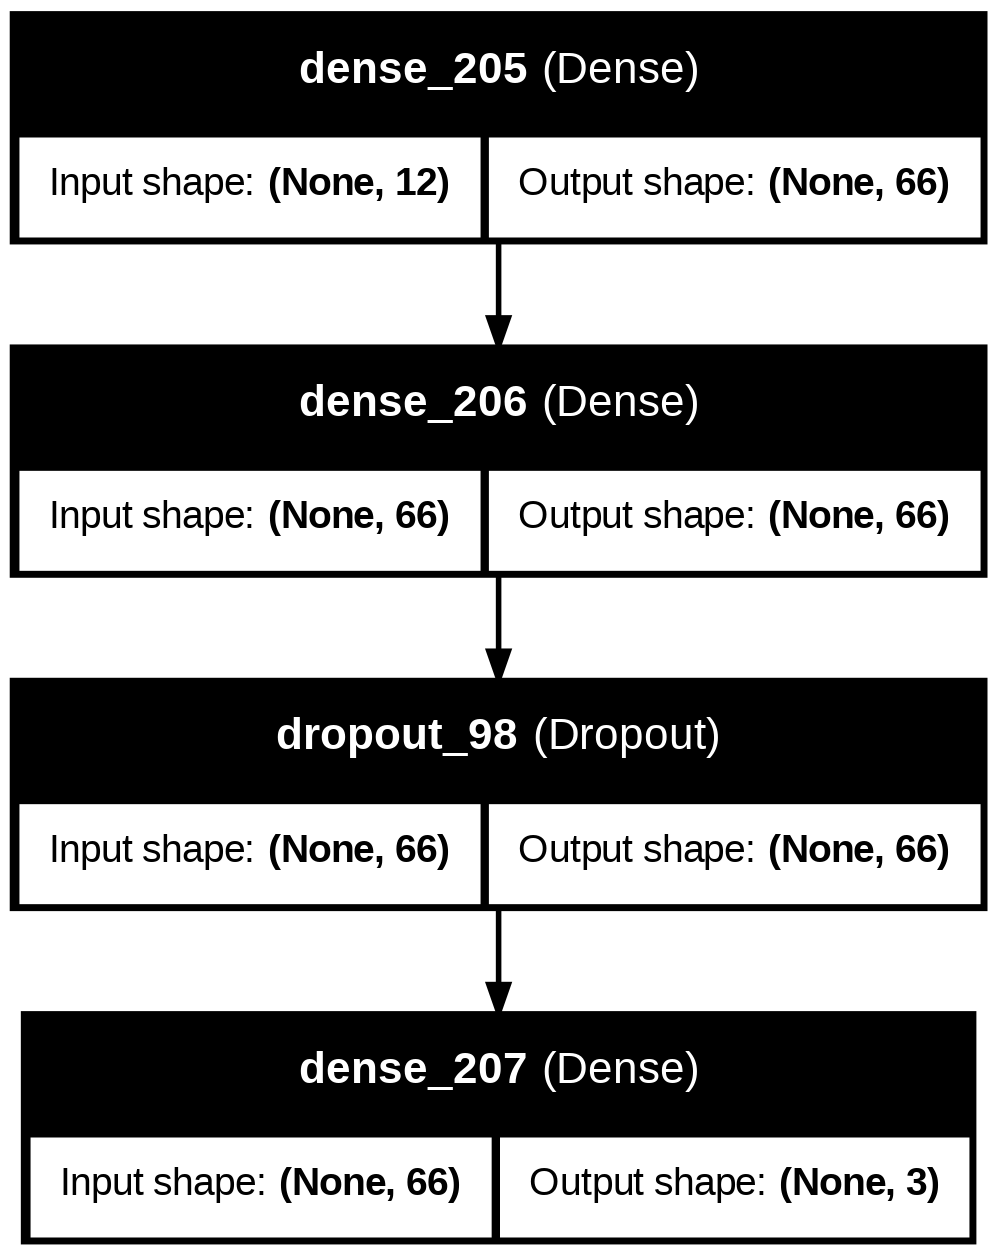

In [38]:
from tensorflow.keras.utils import plot_model

# Plot model architecture
plot_model(final_model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [40]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 25.3 MB/s eta 0:00:00


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import numpy as np
import shap
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from optuna.visualization import plot_param_importances, plot_optimization_history

# Hyperparameter Importance
plot_param_importances(study)
plt.title("Hyperparameter Importance")
plt.show()

# Optimization History (Performance over trials)
plot_optimization_history(study)
plt.title("Optimization History")
plt.show()

from sklearn.metrics import confusion_matrix

# Predict on test set
# Instead of using `predict_classes`, use `argmax` on the prediction probabilities
y_pred_probs = final_model.predict(X_test)  # Get probabilities
y_pred = np.argmax(y_pred_probs, axis=1)    # Get class predictions


# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


# SHAP Explanation
explainer = shap.DeepExplainer(final_model, X_train)
#shap_values = explainer.shap_values(X_test)

# Feature Importance Plot
#shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Assuming you have baseline metrics
baseline_metrics = {
    "Model": ["Baseline", "Final Model"],
    "Accuracy": [0.85, final_accuracy],
    "Precision": [precision_score(y_test, y_pred, average='weighted'), 0.87],
    "Recall": [recall_score(y_test, y_pred, average='weighted'), 0.88],
    "F1-Score": [f1_score(y_test, y_pred, average='weighted'), 0.86],
    "AUC": [roc_auc_score(y_test, final_model.predict(X_test), multi_class='ovr'), 0.91]
}

df_metrics = pd.DataFrame(baseline_metrics)
print(df_metrics)

from sklearn.metrics import roc_curve, auc
# For binary classification, we can compute the ROC curve
#fpr, tpr, _ = roc_curve(y_test, final_model.predict(X_test)[:,1])
#roc_auc = auc(fpr, tpr)

# Plot ROC curve





ModuleNotFoundError: No module named 'shap'

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
